In [36]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
#from tensorflow.keras import layers
#need tensorflow gpu 

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)



Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1733523687.103975    4187 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2613 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [69]:
from Exctract_features import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df1 = create_dataset(pwd, 'ohe', True) 
print("Done")# Depuis le script Exctract_features
display(df1)

Precessing files ...


Processing files: 100%|██████████████████████| 513/513 [00:00<00:00, 660.77it/s]


Encoding ...
OneHot Encoding ...


Processing files: 100%|████████████████| 77963/77963 [00:01<00:00, 55884.29it/s]


Resampling ...
Processing... Please wait.
Resampling complete!
Done


/home/ygouzy/Documents/GitHub/MLP_avec_Taveau/Exctract_features.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['DSSP'] = y_resampled


,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,DSSP
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
x = df1.drop('DSSP', axis=1)
y = df1['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0         2
1         2
2         2
3         2
4         2
         ..
111433    1
111434    1
111435    1
111436    1
111437    1
Name: DSSP, Length: 111438, dtype: int64

In [70]:
display(df1)
print(df1)

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,DSSP
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


        0  1  2  3  4  5  6  7  8  9  ...  251  252  253  254  255  256  257  \
0       0  1  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    1    0   
1       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    1    0   
2       0  0  0  1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3       0  0  0  0  1  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    1    0    0   
...    .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
111433  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
111434  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
111435  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
111436  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
111437  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

        258  259  DSSP  
0         0   

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [85]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='min')

In [86]:
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu'),  
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

opt = keras.optimizers.Adam(learning_rate=0.008)
#3 sortit couche softmax pour avoir les proba de chaque class 
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [87]:
history = model.fit(X_train, y_train_one_hot, epochs=3, batch_size=32, validation_data=(X_test, y_test_one_hot),callbacks=early_stopping)

Epoch 1/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6073 - loss: 0.8417 - val_accuracy: 0.6525 - val_loss: 0.7643
Epoch 2/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6708 - loss: 0.7289 - val_accuracy: 0.6635 - val_loss: 0.7483
Epoch 3/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7106 - loss: 0.6621 - val_accuracy: 0.6570 - val_loss: 0.7720


In [88]:
# Function to plot training and validation loss
def plot_loss(history, title="Loss Curve"):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

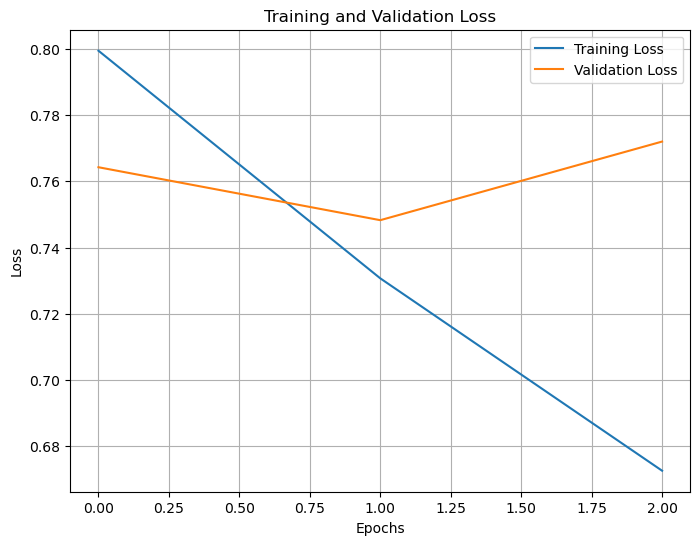

In [89]:
# Call the plot_loss function with the captured history
plot_loss(history, title="Training and Validation Loss")

In [90]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6589 - loss: 0.7656
Loss: 0.7720, Accuracy: 65.6990


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step


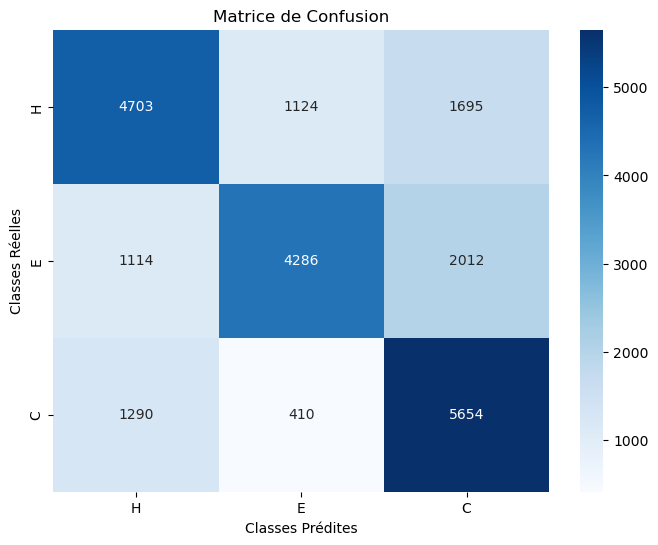

In [91]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [92]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Conversion en classes

# Labels vrais
y_true_classes = np.argmax(y_test_comb, axis=1)

# Noms des classes (optionnel)
class_names = ['Classe 1', 'Classe 2', 'Classe 3']

# Rapport de classification
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

697/697 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
              precision    recall  f1-score   support

    Classe 1       0.66      0.63      0.64      7522
    Classe 2       0.74      0.58      0.65      7412
    Classe 3       0.60      0.77      0.68      7354

    accuracy                           0.66     22288
   macro avg       0.67      0.66      0.66     22288
weighted avg       0.67      0.66      0.66     22288



In [13]:
from Exctract_features import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df2 = create_dataset(pwd, 'freq',True) # Depuis le script Exctract_features
display(df2)

Precessing files ...


Processing files: 100%|██████████████████████| 513/513 [00:00<00:00, 678.79it/s]


Encoding ...
Frequences calculation ...


Processing files: 100%|███████████████| 77963/77963 [00:00<00:00, 304090.64it/s]


Resampling ...
Processing... Please wait.
Resampling complete!


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,DSSP
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923,2
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923,2
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923,2
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923,2
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0.109593,0.076923,0.153846,0.076923,0.044253,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923,1
111434,0.076923,0.025690,0.076923,0.076923,0.051233,0.128156,0.025690,0.128156,0.076923,0.025690,...,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000,1
111435,0.076923,0.133752,0.000000,0.097017,0.000000,0.000000,0.076923,0.076923,0.000000,0.020094,...,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923,1
111436,0.000000,0.076923,0.076923,0.153846,0.000000,0.000000,0.076733,0.000000,0.000000,0.000000,...,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656,1


In [14]:
x = df2.drop('DSSP', axis=1)
y = df2['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0.109593,0.076923,0.153846,0.076923,0.044253,0.000000,0.000000,0.000000,0.076923,0.000000,0.153846,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923
111434,0.076923,0.025690,0.076923,0.076923,0.051233,0.128156,0.025690,0.128156,0.076923,0.025690,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000
111435,0.076923,0.133752,0.000000,0.097017,0.000000,0.000000,0.076923,0.076923,0.000000,0.020094,0.076923,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923
111436,0.000000,0.076923,0.076923,0.153846,0.000000,0.000000,0.076733,0.000000,0.000000,0.000000,0.230769,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656


0         2
1         2
2         2
3         2
4         2
         ..
111433    1
111434    1
111435    1
111436    1
111437    1
Name: DSSP, Length: 111438, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train2 = to_categorical(y_train, num_classes=3)
y_test2 = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [45]:
model2 = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [47]:
history2 = model2.fit(X_train, y_train2, 
                    epochs=40, 
                    batch_size=32, 
                    validation_data=(X_test, y_test2), 
                    callbacks=early_stopping)


Epoch 1/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4903 - loss: 1.0014 - val_accuracy: 0.4951 - val_loss: 0.9894
Epoch 2/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5053 - loss: 0.9803 - val_accuracy: 0.5145 - val_loss: 0.9684
Epoch 3/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5336 - loss: 0.9428 - val_accuracy: 0.5427 - val_loss: 0.9222
Epoch 4/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5769 - loss: 0.8836 - val_accuracy: 0.5801 - val_loss: 0.8833
Epoch 5/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6247 - loss: 0.8035 - val_accuracy: 0.6067 - val_loss: 0.8268
Epoch 6/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6695 - loss: 0.7273 - val_accuracy: 0.6487 - val_loss: 0.7783
Epoch 7/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7133 - loss: 0.6490 - val_accuracy: 0.6758 - val_loss: 0.7439
Epoch 8/40
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7565 - loss: 0.5694 - 

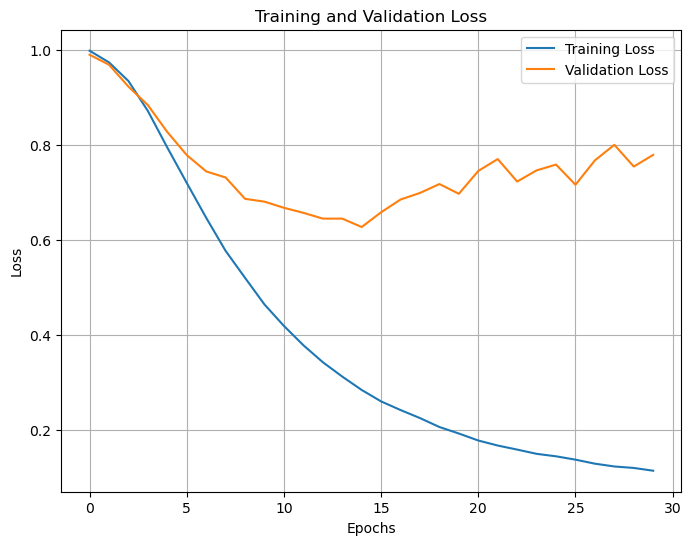

In [48]:
# Call the plot_loss function with the captured history
plot_loss(history2, title="Training and Validation Loss")

In [49]:
loss, accuracy = model2.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8030 - loss: 0.7695  
Loss: 0.7787, Accuracy: 80.1463


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step


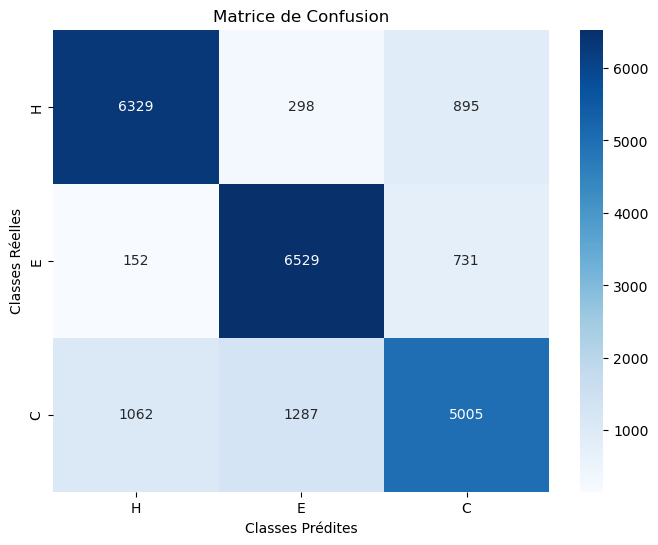

In [50]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [51]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Conversion en classes

# Labels vrais
y_true_classes = np.argmax(y_test_comb, axis=1)

# Noms des classes (optionnel)
class_names = ['Classe 1', 'Classe 2', 'Classe 3']

# Rapport de classification
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

697/697 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
              precision    recall  f1-score   support

    Classe 1       0.84      0.84      0.84      7522
    Classe 2       0.80      0.88      0.84      7412
    Classe 3       0.75      0.68      0.72      7354

    accuracy                           0.80     22288
   macro avg       0.80      0.80      0.80     22288
weighted avg       0.80      0.80      0.80     22288



In [66]:
print(df1.index)
#print(df2.index)

Index(['RTDCYGNVNRIDT', 'TDCYGNVNRIDTT', 'DCYGNVNRIDTTG', 'CYGNVNRIDTTGA',
       'YGNVNRIDTTGAS', 'GNVNRIDTTGASC', 'NVNRIDTTGASCK', 'VNRIDTTGASCKT',
       'NRIDTTGASCKTA', 'RIDTTGASCKTAK',
       ...
       'WGSCGIGPGYCGA', 'GSCGIGPGYCGAG', 'SCGIGPGYCGAGC', 'CGIGPGYCGAGCQ',
       'GIGPGYCGAGCQS', 'IGPGYCGAGCQSG', 'GPGYCGAGCQSGG', 'PGYCGAGCQSGGC',
       'GYCGAGCQSGGCD', 'YCGAGCQSGGCDA'],
      dtype='object', name='RES', length=77963)


In [71]:
combine_df = pd.concat([df1, df2.drop(columns = 'DSSP')], axis = 1)
display(combine_df)

,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923
2,0,0,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
3,0,0,0,0,1,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0.153846,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923
111434,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000
111435,0,0,0,0,0,0,0,0,0,0,...,0.076923,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923
111436,0,0,0,0,0,0,0,0,0,0,...,0.230769,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656


In [72]:
x = combine_df.drop('DSSP', axis=1)
y = combine_df['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,0.076923,0.076923
2,0,0,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
3,0,0,0,0,1,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.0,0.076923,0.076923
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.0,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111433,0,0,0,0,0,0,0,0,0,0,...,0.153846,0.109593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.121176,0.076923
111434,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.0,0.000000,0.000000
111435,0,0,0,0,0,0,0,0,0,0,...,0.076923,0.000000,0.000000,0.076923,0.210675,0.076923,0.000000,0.0,0.000000,0.076923
111436,0,0,0,0,0,0,0,0,0,0,...,0.230769,0.077113,0.076923,0.000000,0.000000,0.076923,0.000000,0.0,0.000190,0.153656


0         2
1         2
2         2
3         2
4         2
         ..
111433    1
111434    1
111435    1
111436    1
111437    1
Name: DSSP, Length: 111438, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_comb = to_categorical(y_train, num_classes=3)
y_test_comb = to_categorical(y_test, num_classes=3)
display(y_train_comb)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [76]:
model3 = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
opt = keras.optimizers.Adam(learning_rate=0.008)
model3.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
history3 = model3.fit(X_train, y_train_comb, 
                    epochs=3, 
                    batch_size=32, 
                    validation_data=(X_test, y_test_comb), 
                    callbacks=early_stopping)


Epoch 1/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7703 - loss: 0.5595 - val_accuracy: 0.6577 - val_loss: 0.7782
Epoch 2/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8277 - loss: 0.4435 - val_accuracy: 0.6541 - val_loss: 0.9180
Epoch 3/3
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8673 - loss: 0.3627 - val_accuracy: 0.6406 - val_loss: 0.9964


In [80]:
loss, accuracy = model3.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6418 - loss: 0.9875
Loss: 0.9964, Accuracy: 64.0569


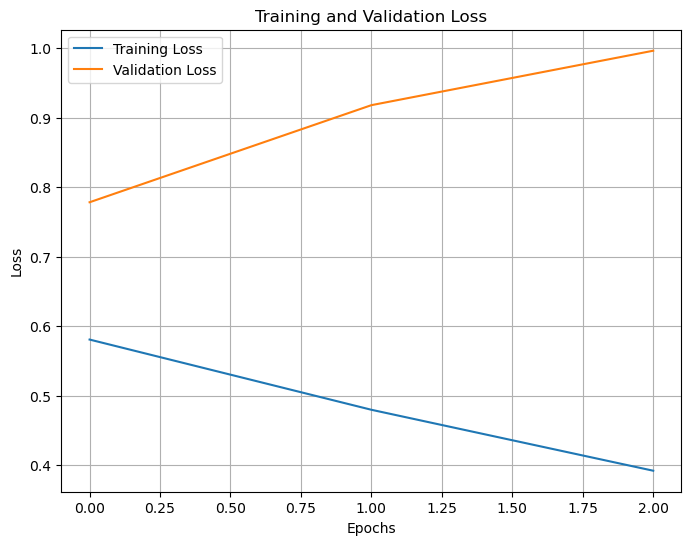

In [81]:
# Call the plot_loss function with the captured history
plot_loss(history3, title="Training and Validation Loss")

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step


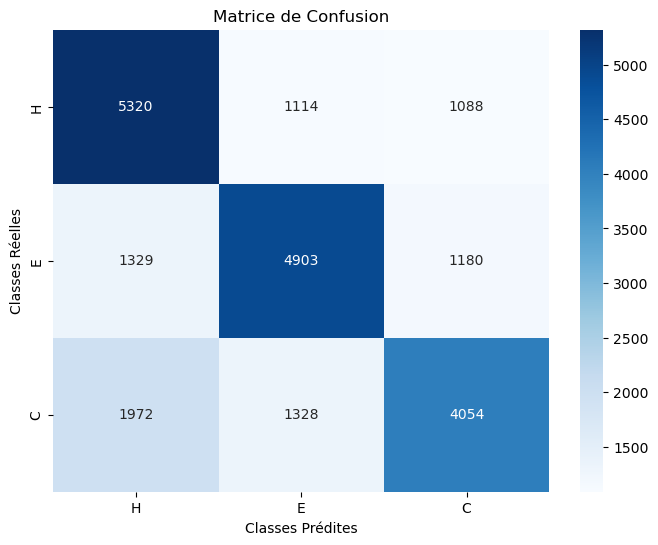

In [82]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [83]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Conversion en classes

# Labels vrais
y_true_classes = np.argmax(y_test_comb, axis=1)

# Noms des classes (optionnel)
class_names = ['Classe 1', 'Classe 2', 'Classe 3']

# Rapport de classification
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
              precision    recall  f1-score   support

    Classe 1       0.62      0.71      0.66      7522
    Classe 2       0.67      0.66      0.66      7412
    Classe 3       0.64      0.55      0.59      7354

    accuracy                           0.64     22288
   macro avg       0.64      0.64      0.64     22288
weighted avg       0.64      0.64      0.64     22288

